<a href="https://colab.research.google.com/github/TyrealQ/AI-Conversation/blob/main/Basic_Multimodal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Overview

This codebook offers a collection of code and detailed guides for multimodal processing using Hugging Face's Transformers library. It covers key applications such as image classification and speech recognition. Each section provides step-by-step explanations and code snippets to help users effectively implement pre-trained models for various multimodal tasks.

Designed for both beginners and intermediate users, this resource serves as a practical reference for leveraging pre-trained models with minimal effort, enabling seamless integration of vision, speech, and text processing capabilities.

Code authored by: **[Tyreal Qian](https://tyrealq.github.io/)**

## Install dependencies

In [ ]:
# %%capture
!pip install transformers

In [ ]:
# Use transformers to load pre-trained models for NLP tasks
from transformers import pipeline

# Use pandas for data manipulation and analysis
import pandas as pd

# Use requests to make HTTP requests
import requests

# Use PIL (Pillow) to handle and manipulate images
from PIL import Image

## Image classification

### HF Pipeline

- [Hugging Face Image Classification Models](https://huggingface.co/models?pipeline_tag=image-classification&sort=trending) <br>A collection of models that can analyze and classify image.

- [Hugging Face Transformers Documentation](https://huggingface.co/docs/transformers/en/index) <br>A user-friendly guide for using Hugging Face's "Transformers" library. It provides pre-trained models for a variety of tasks, helping users apply AI without needing to train models from scratch.

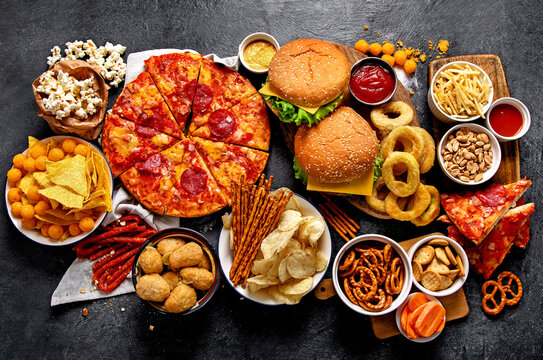

In [ ]:
# Define the image URL
url = "https://t4.ftcdn.net/jpg/08/44/23/93/360_F_844239361_Ih3pGMXpLdj5QjN6nYkKV9Jysmcl6EJ8.jpg"

# Open the image from the URL using requests and PIL
image = Image.open(requests.get(url, stream=True).raw)

# Display the image
image

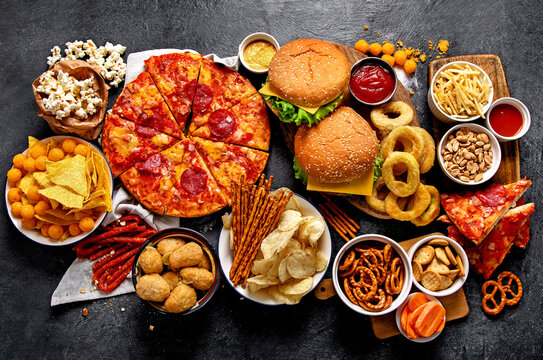

In [ ]:
# Define the local path to the image stored in Google Drive
image_path = "/content/drive/MyDrive/Images/BaseballFoods.png"

# Open the image using PIL (Pillow)
image = Image.open(image_path)

# Display the image
image

In [ ]:
# Load a pre-trained image classification model
objDetector = pipeline(task="image-classification",
                       model="nateraw/baseball-stadium-foods")

# Apply the object detector to classify the image
results = objDetector(image)

# Display the classification results
results

Invalid model-index. Not loading eval results into CardData.
Device set to use cuda:0


[{'label': 'nachos', 'score': 0.7582608461380005},
 {'label': 'hamburger', 'score': 0.09225063771009445},
 {'label': 'hot dog', 'score': 0.06362994015216827},
 {'label': 'popcorn', 'score': 0.05017408728599548},
 {'label': 'cotton candy', 'score': 0.035684481263160706}]

In [ ]:
# Convert the classification results into a Pandas DataFrame for better visualization
df = pd.DataFrame(results)
df

,label,score
0,nachos,0.758261
1,hamburger,0.092251
2,hot dog,0.063630
3,popcorn,0.050174
4,cotton candy,0.035684


## Speech recognition

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("automatic-speech-recognition", model="openai/whisper-large-v3-turbo", return_timestamps=True)

config.json:   0%|          | 0.00/1.26k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.62G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.77k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.71M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/340 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
# Load an audio file (ensure you upload one or provide a URL)
audio_path = "/content/drive/MyDrive/Audios/1.wav"

# Run inference on the audio file
result = pipe(audio_path)

/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
Whisper did not predict an ending timestamp, which can happen if audio is cut off in the middle of a word. Also make sure WhisperTimeStampLogitsProcessor was used during generation.


In [ ]:
# Print the transcribed text
print(result["text"])

 Greetings, everyone. Hope you're having an amazing day. Welcome to a special episode of our podcast. I'm Ty, and today we're doing something a bit different. I've invited my wife, Tracy, to take over hosting duties. Her background in communication and talent for breaking down difficult topics into understandable pieces will add a fresh dimension to today's discussion. Tracy, thank you for being here and for agreeing to host today. Thank you for having me. I have to say, even though football and streaming platforms aren't exactly my thing, Living With You has given me a front row seat to how passionate you are about this topic. For our listeners who might be like Nini and need a bit of context, could you start by explaining what Thursday Night Football is and how Twitch fits into the picture?
